# Network/Graph Analysis in Python

**NetworkX**: Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

Installation: 
`$ pip install networkx`

Version check in Python:
`networkx.__version__`

Upgrade:
`$ pip install networkx --upgrade`

**nxviz**: network visualization package

Installation:
`$ pip install nxviz`

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import nxviz as nv
from collections import Counter

%matplotlib inline

**Some open source network data locations:**

* **graph examples embedded in NetworkX:**
    * Zachary's Karate Club: `nx.karate_club_graph()`
    * Davis Southern women social network: `nx.davis_southern_women_graph()`
    *  Florentine families: `nx.florentine_families_graph()`
    * more examples: https://networkx.github.io/documentation/networkx-1.9/examples/index.html
* **The Koblenz Network Collection**: http://konect.uni-koblenz.de/
* **Stanford Large Network Dataset Collection**: https://snap.stanford.edu/data/


**To learn the basics of Network Science: http://networksciencebook.com/**


## I. Networks Basics

### 1. Create & Manipulate Networks 

Let's start with simple undirected and unweighted networks. An example of such networks, where we don't have edge direction (in/out) or edge weight (indicating how strong a connection is), would be the Facebook network. If you are a friend of mine, I am a friend of yours, and the edge connecting us is either 1 (connected) or non-existent (not connected). We will generate more complex networks later on.

**Nodes**: can represent anything (images, webpage URL links, people, power stations, numbers, words, etc.)

**Edges**: represent relationships between nodes

In [2]:
# create empty network
G = nx.Graph()

In [3]:
# add one node with label '1'
G.add_node(1)

In [4]:
# add nodes from a list of elements
G.add_nodes_from(['Mary', 4, 'Alice', 'Mary'])

In [5]:
# remove node
G.remove_node('Mary')

In [6]:
# remove multiple nodes
G.remove_nodes_from(['Mary', 1])

In [7]:
# view nodes in network G
G.nodes

NodeView((4, 'Alice'))

In [8]:
# add single edge - tuple of nodes (source, target)
# this also adds nodes if they don't already exist
G.add_edge('Mary','Steven')

In [9]:
# add multiple of edges (list of tuples)
G.add_edges_from([('Mary', 'Steven') , ('Mary', 'Alice')])

In [10]:
# view edges in network G
G.edges

EdgeView([('Alice', 'Mary'), ('Mary', 'Steven')])

In [11]:
# remove edge
G.remove_edge('Mary','Alice')

In [12]:
# remove multiple edges (list of tuples)
G.remove_edges_from([('Mary', 'Steven') , ('Mary', 'Alice')])

In [13]:
# get number of nodes in network G
G.number_of_nodes()

4

In [14]:
# get number of edges in network G
G.number_of_edges()

0

In [15]:
# get Alice's number of neighbors (connections)
G.degree('Alice')

0

In [16]:
# empty the network
G.clear()

**Load network from file.** You can read/write a graph in a file using common graph formats (edge lists, adjacency lists, GML, GraphML, pickle, LEDA, etc.).

To see how to read different types of adjancency formats, check here: https://networkx.github.io/documentation/networkx-1.10/reference/readwrite.html

In [67]:
# input edgelist from file
G = nx.read_edgelist("datafiles/social/facebook/fb.txt")

In [68]:
# output edgelist to file
nx.write_edgelist(G,'fb.edgelist')

In [69]:
# get the 2nd node's neighbors (retrieves a dictionary)
dict_neighbors = G.neighbors('2')

In [451]:
list(dict_neighbors)

['1',
 '3',
 '7',
 '9',
 '11',
 '12',
 '16',
 '17',
 '18',
 '23',
 '51',
 '53',
 '479',
 '1079',
 '1132',
 '1237',
 '1645',
 '2053',
 '2054',
 '2055',
 '2056',
 '2057',
 '2058',
 '2059',
 '2060',
 '2061']

In [452]:
# number of total nodes in graph
len(G.nodes)

63731

In [453]:
# number of total edges in graph
len(G.edges)

817035

In [454]:
nx.degree_assortativity_coefficient(G)

0.17701535770918256

In [455]:
nx.degree_pearson_correlation_coefficient(G)

0.17701535770918173

In [456]:
G.clear()

### 2. Network Types 

#### a. Weighted Graphs

**Edge weight.** Consider that the edge that you are adding should contain additional information, such as the strength of the connection. This would be important, for example, when analyzing communication networks to check friendship/connectivity strength. You want to capture how many times they exchanged e-mails, calls, text messages, to indicate the strength of the connection. For this you will assign weights to the edge, values that can be the number of communications, or the fraction of communications, normalized.

In [457]:
# assign weight to edge
G.add_edge('Mary','Steven', weight=5)

In [458]:
G.edges

EdgeView([('Mary', 'Steven')])

In [459]:
# access edge properties
G['Mary']['Steven']

{'weight': 5}

In [460]:
# change edge weight
G['Mary']['Steven']['weight'] = 1

#### b. Directed Graphs

**Edge direction.** Edges have direction describing source -> target node relationship.

In [461]:
#undirected
G.nodes

NodeView(('Mary', 'Steven'))

In [462]:
dg = nx.DiGraph()

In [463]:
# you can create an undirected representation of network G
nx.to_undirected(G)

In [464]:
# you can create a directed representation of network G
dg = nx.to_directed(G)

In [465]:
dg.edges

OutEdgeView([('Mary', 'Steven'), ('Steven', 'Mary')])

#### c. Multigraphs

Many algorithms are not well defined on such graphs. Therefore, you should convert such graphs rather to a standard graph in a way that makes the measurement well defined.

In [466]:
# multigraphs can store multiple edges information between same two nodes that can have different properties
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 3.0), (1, 2, 75), (2, 3, 5), (1, 2, 4.2)])

In [467]:
# lists the edges (node1, node2, edge_index), including the multiedges, adding the multiedge index as 3rd element in edge tuple
MG.edges

MultiEdgeView([(1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 3, 0)])

In [468]:
# lists the edges (node1, node2, weight/edge_attribute), the 3rd element is the weights of the edges
MG.edges.data('weight')

MultiEdgeDataView([(1, 2, 3.0), (1, 2, 75), (1, 2, 4.2), (2, 3, 5)])

In [469]:
MG.edges.data()

MultiEdgeDataView([(1, 2, {'weight': 3.0}), (1, 2, {'weight': 75}), (1, 2, {'weight': 4.2}), (2, 3, {'weight': 5})])

In [470]:
# check the weight of an edge
MG[1][2]

AtlasView({0: {'weight': 3.0}, 1: {'weight': 75}, 2: {'weight': 4.2}})

#### d. Bipartite Network

Bipartite graphs B = (U, V, E) have two node sets U, V and edges in E that only connect nodes from opposite sets.

Taken from NetworkX documentation:
* NetworkX does not have a custom bipartite graph class 
* Graph() or DiGraph() classes can be used to represent bipartite graphs 
* you have to keep track of which set each node belongs to, and make sure that there is no edge between nodes of the same set 
* convetion: use a node attribute named *bipartite* with values 0 or 1 to identify the sets each node belongs to. This convention is not enforced in the source code of bipartite functions, it’s only a recommendation.

For more details: https://networkx.github.io/documentation/stable/reference/algorithms/bipartite.html

In [471]:
from networkx.algorithms import bipartite

In [472]:
bip = nx.Graph()

In [473]:
# add nodes with the node attribute "bipartite", a network of who likes what fruits
bip.add_nodes_from(['apple', 'peach', 'watermelon', 'pear'], bipartite=0)
bip.add_nodes_from(['Alice', 'Steve', 'Mary'], bipartite=1)

In [474]:
bip.add_edges_from([('Alice', 'apple'), ('Alice', 'peach'), ('Steve', 'watermelon'), 
                    ('Mary', 'pear'), ('Mary', 'apple'), ('Mary', 'watermelon')])

/Users/lgaalves/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


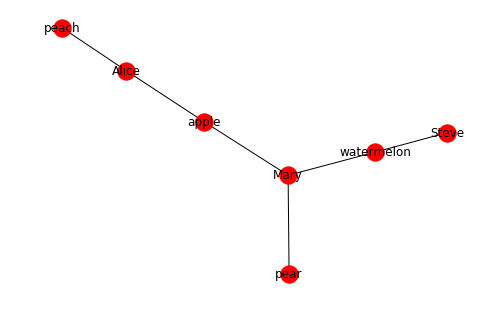

In [475]:
nx.draw(bip, with_labels=True)

NetworkX does not provide a bipartite graph visualization method to visually delimit the two sets of nodes. However, we can draw the left and right set of nodes and see how they connect to each other. Further, you can play around with coloring the nodes based on the 'bipartite' attribute to further refine visually to which node set each node belongs to.

/Users/lgaalves/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


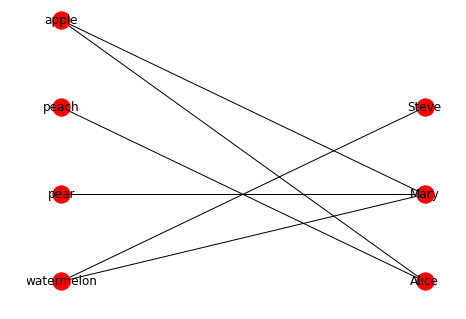

In [476]:
import scipy.sparse as sparse

X, Y = bipartite.sets(bip)
pos = dict()
pos.update((n, (0, i*10)) for i, n in enumerate(X))
pos.update((n, (0.5, i*10)) for i, n in enumerate(Y))
nx.draw(bip, with_labels=True, pos=pos)

Bipartite graphs can be projected as two separate graphs G1 = (U, E1) and G2 = (V, E2). The edges will be different though. Let's take the above example. We can create a network of fruits, where nodes will be fruits and the edges will between two fruits will be created if someone likes both fruits. Such, peach and apple will have one edge, as Alice likes both. Same for apple and pear, which are both liked by Mary. Likewise, we can create the second network as the network of individuals, where connections between them will be their preference for the same fruit. Here, we can create a connection/edge between Steve and Mary since both of them like watermelon. 

### 3. Network Models

Network models can be very useful for comparing their topology to the structural properties of our network built from real data. Different network models have very distinct structural characteristics, which defines their behavior in case of information flow on the network, attacks/failures on the nodes/edges, etc, and these properties have been extensively studied and are well documented. Knowing to which network model your graph corresponds to can provide valuable insights about its potential behavior under various circumstances.

There are a miriad of network models with different topological properties. Here we will try out some of the most useful ones (that frequently occur in real complex systems). 

For more network generation classes: https://networkx.github.io/documentation/networkx-1.10/reference/generators.html

In [477]:
# Barabasi-Albert (scale-free) network 
ba = nx.barabasi_albert_graph(50, 3)

/Users/lgaalves/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


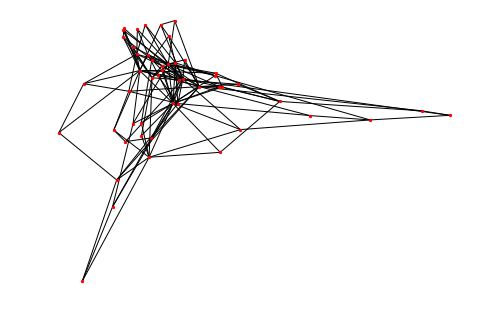

In [478]:
nx.draw_spectral(ba, node_size=5)

In [479]:
# Erdos-Renyi (random) network 
er = nx.erdos_renyi_graph(50, 0.1)

/Users/lgaalves/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


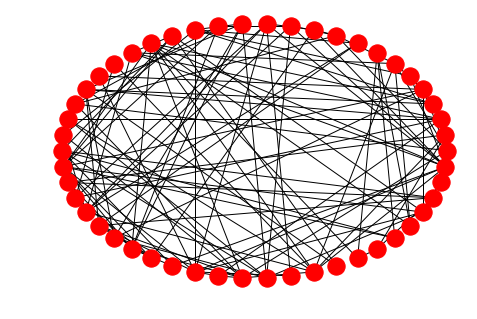

In [480]:
nx.draw_circular(er)

In [481]:
# Watts-Strogatz (small-world) network 
ws = nx.watts_strogatz_graph(50, 6, 0.2)

/Users/lgaalves/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


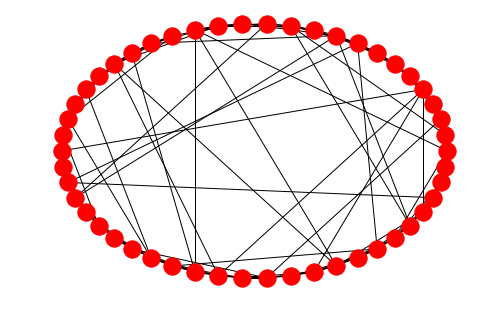

In [482]:
nx.draw_circular(ws)

In [483]:
# random geometric graph (RGG)
rgg = nx.random_geometric_graph(200, 0.125)

/Users/lgaalves/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


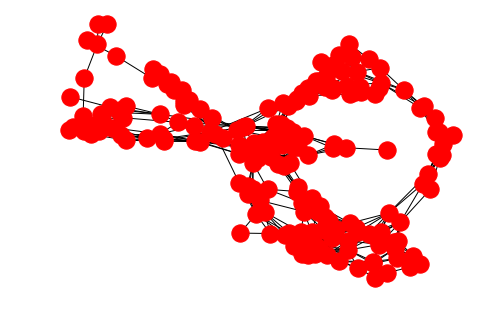

In [484]:
nx.draw(rgg)

In [485]:
# complete graph (every pair of nodes is connected by a unique edge)
complete = nx.complete_graph(6)

/Users/lgaalves/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


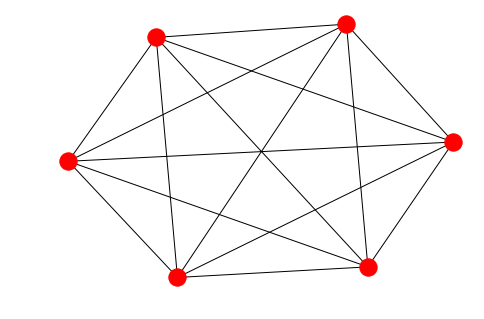

In [486]:
nx.draw(complete)